## Import packages

In [9]:
from sentence_transformers import SentenceTransformer

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Import Model

In [10]:
embedd_model = "all-MiniLM-L6-v2"
model = SentenceTransformer(embedd_model)


In [11]:
label_encoder = LabelEncoder()
svm_model = SVC(kernel = "linear", probability = True)

## Split data

In [12]:
df = pd.read_csv("intent_dataset.csv") # data genereated by ChatGPR
df.head()

,text,intent
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,hey there,greeting
4,hello there,greeting


In [13]:
texts = df['text']
labels = df['intent']

In [14]:
text_embedd = model.encode(texts)
label_encode = label_encoder.fit_transform(labels)

In [15]:
text_train, text_test, label_train, label_test = train_test_split(
    text_embedd,
    label_encode,
    test_size = 0.25,
    shuffle = True, # Data doesn't shuffle all are in contigues way one label after other label starts
    random_state = 42
)

In [16]:
text_test

array([[ 0.04616797,  0.0467227 , -0.00871597, ...,  0.01861245,
        -0.01822803,  0.07377622],
       [ 0.05731727,  0.06386166, -0.06659013, ...,  0.07506887,
         0.07150463, -0.05354507],
       [ 0.0027803 , -0.03894195,  0.01120079, ...,  0.00611281,
        -0.02225973, -0.02053432],
       ...,
       [ 0.10891042, -0.00451708,  0.01861647, ...,  0.01546541,
        -0.0295794 ,  0.03812728],
       [-0.01208401,  0.04599222,  0.01351816, ...,  0.00277766,
         0.07751581, -0.00396008],
       [-0.01532281,  0.04481942, -0.00508616, ..., -0.04746155,
         0.03914139,  0.05401627]], shape=(683, 384), dtype=float32)

In [17]:
label_test

array([ 6,  5,  1, 11,  9,  4,  8,  7,  4,  3,  0,  1, 11,  5, 13,  2,  6,
       11,  9,  0,  4,  7,  8,  0, 11,  3,  5, 12,  6, 11, 12, 11, 11,  1,
        5,  4,  2, 12, 11, 11, 11,  0, 13,  9,  7,  8,  8, 11,  4, 11,  1,
        7, 13,  1,  3, 12, 12,  1,  0,  6,  9, 14,  7,  6,  5,  0,  6, 11,
       12,  7,  3,  0,  8, 11,  2, 12,  7, 13,  8, 10, 14, 12,  0, 14, 14,
        6,  2, 14,  5,  2,  0, 11,  1,  5, 14,  6, 14, 11,  1,  9,  7,  6,
        0,  4,  5,  5,  4,  8, 10,  8,  9,  9,  9, 11,  3,  9,  7, 11, 10,
       10, 13, 12,  6, 12,  4,  4,  4,  5,  4,  0,  1,  1,  8,  8, 11,  0,
       11,  7, 10,  5,  9,  2, 12, 14,  9, 12, 12, 11,  3,  7,  3,  6, 10,
       11,  9, 11, 11,  1, 11,  6,  6, 12, 12,  0,  3, 11, 11,  0,  2,  2,
        1,  6,  7,  1,  1,  6, 13, 12,  0,  1,  6,  1, 13, 12,  8,  9,  7,
        2, 14, 11,  1,  1,  3, 11,  7,  1, 11, 12,  0, 11,  1,  0, 12,  9,
       13,  3, 12,  1,  3,  4, 11,  6,  9,  4,  9,  8,  1,  9,  9, 14, 14,
       12,  1, 12,  0,  6

## Train/Test the model

In [18]:
svm_model.fit(
    text_train,
    label_train
)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [19]:
y_pred_test = svm_model.predict(text_test)
y_pred_train = svm_model.predict(text_train)
print(f"Accuracy_for_testing_data: {accuracy_score(label_test, y_pred_test):.2%}")
print(f"Accuracy_for_training_data: {accuracy_score(label_train, y_pred_train):.2%}")

Accuracy_for_testing_data: 98.10%
Accuracy_for_training_data: 99.22%


In [20]:
print(classification_report(label_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       1.00      0.98      0.99        59
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        45
           5       0.96      1.00      0.98        44
           6       1.00      1.00      1.00        39
           7       0.93      1.00      0.96        39
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        45
          10       0.94      1.00      0.97        29
          11       0.97      0.94      0.95       100
          12       1.00      1.00      1.00        49
          13       1.00      1.00      1.00        29
          14       0.97      1.00      0.99        38

    accuracy                           0.98       683
   macro avg       0.98      0.99      0.98       683
weighted avg       0.98   

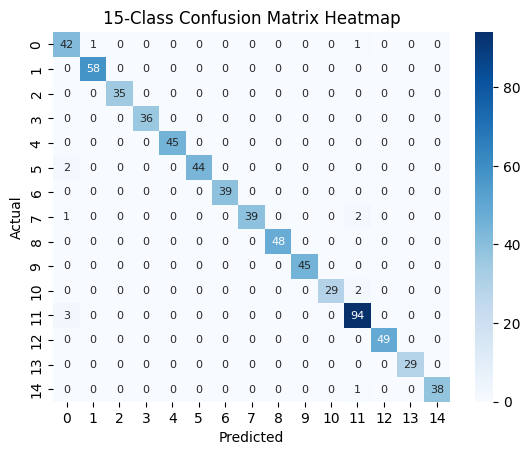

In [21]:
cm = confusion_matrix(y_pred_test, label_test)
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap = 'Blues',
    annot_kws={"size": 8}
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('15-Class Confusion Matrix Heatmap')
plt.show()

In [22]:
joblib.dump({
    "model": svm_model,
    "label_encoder": label_encoder
}, "intent_detect_v1.pkl")


['intent_detect_v1.pkl']

In [7]:
df['intent'].unique()

<StringArray>
[          'greeting',            'goodbye',         'search_car',
        'ask_details',    'filter_location',         'sort_price',
          'sort_year',       'sort_mileage',       'compare_cars',
 'check_availability',    'book_test_drive',     'contact_seller',
    'negotiate_price',  'financing_options',      'fallback_help']
Length: 15, dtype: str